In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Read data set from combined data set from 2015-2023

In [2]:
data=pd.read_csv(r'C:\Users\User\Desktop\project 1-8-2023\dataset new\Final_AQI_Dataset_edited.csv')

<Axes: >

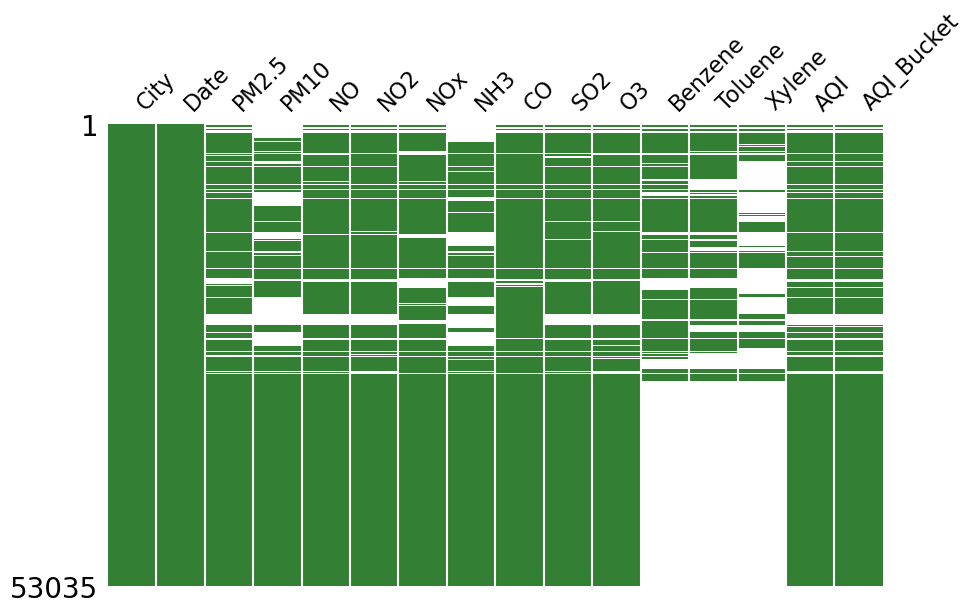

In [3]:
# Display null values filled in different colors
msno.matrix(data, figsize=(10, 6), sparkline=False, color=(0.2, 0.5, 0.2))


In [4]:
data.head(25)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 00:00:00,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02 00:00:00,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03 00:00:00,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04 00:00:00,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05 00:00:00,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06 00:00:00,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07 00:00:00,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08 00:00:00,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09 00:00:00,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10 00:00:00,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [5]:
# Step 3: Check for rows with missing values in all columns
rows_with_missing_values = data[data.isnull().all(axis=1)]

# Display the rows with missing values in all columns
print(rows_with_missing_values)

Empty DataFrame
Columns: [City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, AQI_Bucket]
Index: []


In [6]:
data.tail(50)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
52985,Visakhapatnam,6/4/2023,7.62,16.56,0.00,3.38,1.087216,0.86,323.77,2.80,34.69,NaN,NaN,NaN,34.690000,Good
52986,Visakhapatnam,7/4/2023,9.52,17.37,0.00,3.04,0.977851,1.66,330.45,2.35,29.68,NaN,NaN,NaN,29.680000,Good
52987,Visakhapatnam,8/4/2023,22.12,36.30,0.02,9.85,3.174798,8.23,534.06,7.15,16.27,NaN,NaN,NaN,36.866667,Good
52988,Visakhapatnam,9/4/2023,15.63,28.21,0.00,3.47,1.116165,2.12,360.49,2.24,24.32,NaN,NaN,NaN,28.210000,Good
52989,Visakhapatnam,10/4/2023,33.32,53.02,0.01,6.60,2.126182,4.18,460.62,3.93,19.67,NaN,NaN,NaN,55.533333,Satisfactory
52990,Visakhapatnam,11/4/2023,39.12,57.49,0.00,2.70,0.868486,1.25,333.79,2.00,45.42,NaN,NaN,NaN,65.200000,Satisfactory
52991,Visakhapatnam,12/4/2023,45.35,65.84,0.00,2.29,0.736605,1.98,317.10,2.24,65.09,NaN,NaN,NaN,75.583333,Satisfactory
52992,Visakhapatnam,13-04-2023,42.38,58.68,0.00,1.80,0.578991,1.28,290.39,1.74,53.64,NaN,NaN,NaN,70.633333,Satisfactory
52993,Visakhapatnam,14-04-2023,54.95,73.82,0.00,2.03,0.652973,0.97,307.08,1.76,61.51,NaN,NaN,NaN,91.583333,Satisfactory
52994,Visakhapatnam,15-04-2023,35.93,53.47,0.00,2.06,0.662623,1.50,310.42,1.64,36.48,NaN,NaN,NaN,59.883333,Satisfactory


In [7]:
# Convert "Date" column to datetime
data['Date'] = pd.to_datetime(data['Date'])


<Axes: >

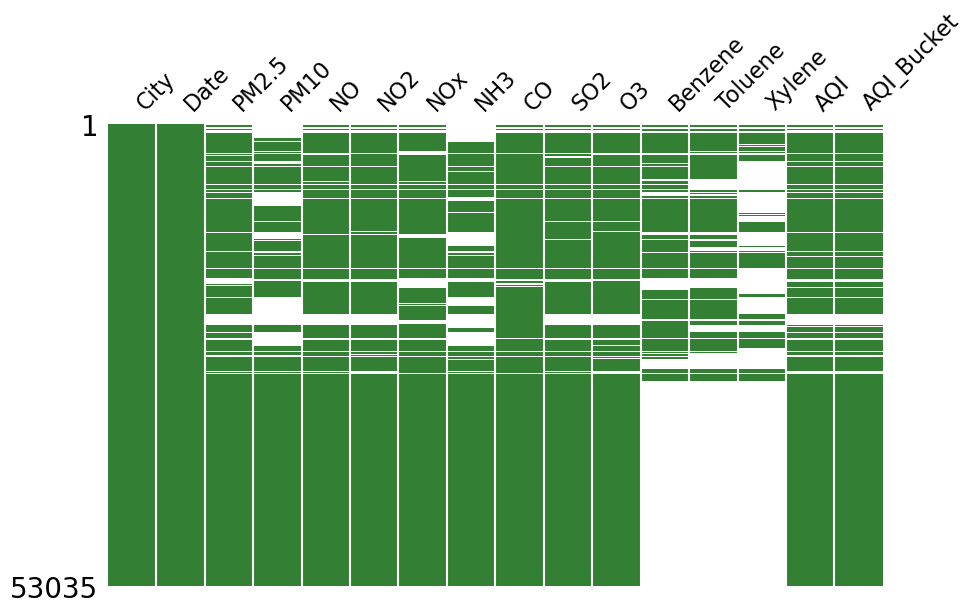

In [8]:
# Display null values filled in different colors
msno.matrix(data, figsize=(10, 6), sparkline=False, color=(0.2, 0.5, 0.2))

In [9]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [10]:
# Fill null values in the selected columns with appropriate city ( forward fill and back ward fill)

In [11]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene       29127
Toluene       31545
Xylene        41613
AQI            4681
AQI_Bucket     4681
dtype: int64

In [12]:
data2=data

In [13]:
# Drop columns with null values in the 'AQI' column
#data= data.dropna(subset=['AQI'])


# Droping 'Benzene', 'Toluene', 'Xylene' columns

In [14]:
import pandas as pd


# Display the DataFrame to understand its structure
print(data.head())

# Dropping the specified columns
columns_to_drop = ['Benzene', 'Toluene', 'Xylene']
data.drop(columns=columns_to_drop, inplace=True)

# Display the DataFrame after dropping the columns
print(data.head())


        City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
        City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   Na

# Fill null values in the selected columns with appropriate city ( forward fill and back ward fill)

                City       Date  PM2.5    PM10     NO    NO2        NOx   NH3  \
0          Ahmedabad 2015-01-01  73.24  141.54   0.92  18.22  17.150000  8.36   
1          Ahmedabad 2015-01-02  73.24  141.54   0.97  15.69  16.460000  8.36   
2          Ahmedabad 2015-01-03  73.24  141.54  17.40  19.30  29.700000  8.36   
3          Ahmedabad 2015-01-04  73.24  141.54   1.70  18.48  17.970000  8.36   
4          Ahmedabad 2015-01-05  73.24  141.54  22.10  21.42  37.760000  8.36   
...              ...        ...    ...     ...    ...    ...        ...   ...   
53030  Visakhapatnam 2023-05-21  37.53   47.09   0.00   2.08   0.669056  0.08   
53031  Visakhapatnam 2023-05-22  32.17   43.44   0.00   3.77   1.212664  1.74   
53032  Visakhapatnam 2023-05-23  36.01   48.06   0.00   4.28   1.376711  1.20   
53033  Visakhapatnam 2023-05-24  30.17   48.89   0.00   1.36   0.437460  0.00   
53034  Visakhapatnam 2023-05-25  52.36   61.41   0.00   6.00   1.929969  0.20   

           CO    SO2      O

<Axes: >

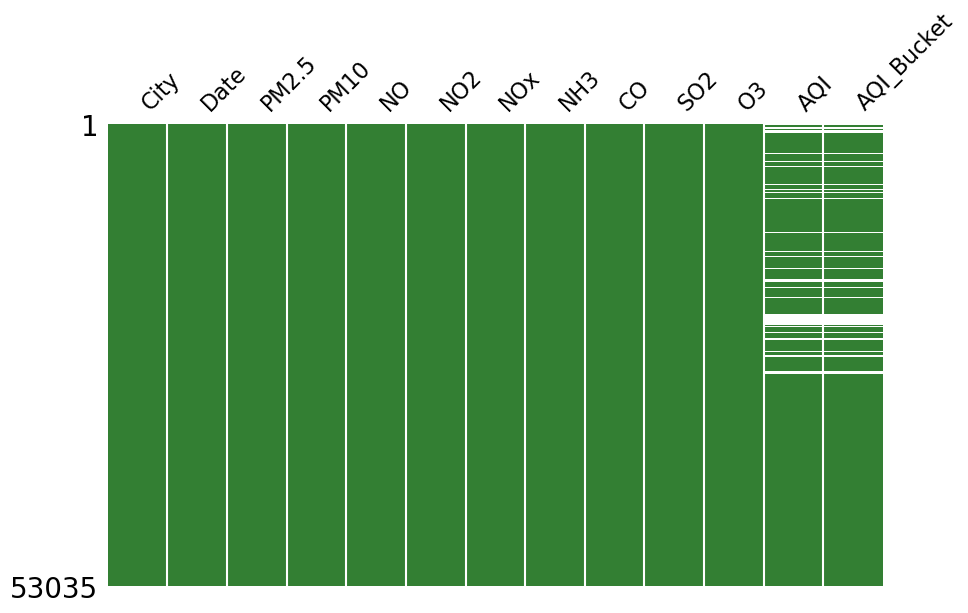

In [15]:
import pandas as pd
import missingno as msno

# Read the CSV file into a DataFrame
#data = pd.read_csv(r'C:\Users\User\Desktop\combined data set final\Final_AQI_Dataset.csv')

# Get a list of columns to fill null values in (exclude 'AQI_Bucket' and 'AQI')
columns_to_fill = data.columns.difference(['AQI','AQI_Bucket'])

# Fill null values in the selected columns for each city separately
data[columns_to_fill] = data.groupby('City')[columns_to_fill].apply(lambda group: group.fillna(method='ffill').fillna(method='bfill'))

# Print the updated DataFrame
print(data)

# Display null values filled in different colors
msno.matrix(data, figsize=(10, 6), sparkline=False, color=(0.2, 0.5, 0.2))


In [16]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.150000,8.36,0.92,27.64,133.36,NaN,NaN
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.460000,8.36,0.97,24.55,34.06,NaN,NaN
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.700000,8.36,17.40,29.07,30.70,NaN,NaN
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.970000,8.36,1.70,18.59,36.08,NaN,NaN
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.760000,8.36,22.10,39.33,39.31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53030,Visakhapatnam,2023-05-21,37.53,47.09,0.00,2.08,0.669056,0.08,353.81,4.11,100.14,100.102941,Moderate
53031,Visakhapatnam,2023-05-22,32.17,43.44,0.00,3.77,1.212664,1.74,380.52,5.07,82.97,82.970000,Satisfactory
53032,Visakhapatnam,2023-05-23,36.01,48.06,0.00,4.28,1.376711,1.20,390.53,5.19,80.11,80.110000,Satisfactory
53033,Visakhapatnam,2023-05-24,30.17,48.89,0.00,1.36,0.437460,0.00,300.41,2.21,95.84,95.840000,Satisfactory


<Axes: >

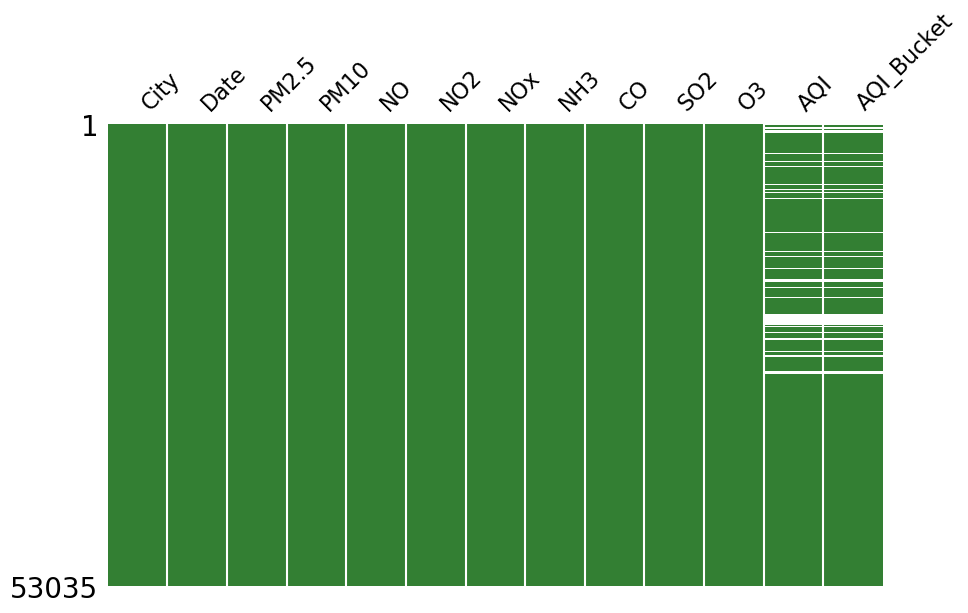

In [17]:
# Display null values filled in different colors
msno.matrix(data, figsize=(10, 6), sparkline=False, color=(0.2, 0.5, 0.2))


In [18]:
data.tail(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
53025,Visakhapatnam,2023-05-16,83.70,126.52,0.0,9.51,3.059000,4.75,614.17,6.02,67.95,139.500000,Moderate
53026,Visakhapatnam,2023-05-17,38.16,77.24,0.0,2.78,0.894219,0.53,297.07,2.26,72.96,77.240000,Satisfactory
53027,Visakhapatnam,2023-05-18,11.00,32.91,0.0,1.12,0.360261,0.36,263.69,1.13,46.49,46.490000,Good
53028,Visakhapatnam,2023-05-19,24.84,48.10,0.0,1.54,0.495359,0.00,310.42,2.83,80.82,80.820000,Satisfactory
53029,Visakhapatnam,2023-05-20,27.20,37.39,0.0,2.63,0.845970,0.39,340.46,4.05,91.55,91.550000,Satisfactory
53030,Visakhapatnam,2023-05-21,37.53,47.09,0.0,2.08,0.669056,0.08,353.81,4.11,100.14,100.102941,Moderate
53031,Visakhapatnam,2023-05-22,32.17,43.44,0.0,3.77,1.212664,1.74,380.52,5.07,82.97,82.970000,Satisfactory
53032,Visakhapatnam,2023-05-23,36.01,48.06,0.0,4.28,1.376711,1.20,390.53,5.19,80.11,80.110000,Satisfactory
53033,Visakhapatnam,2023-05-24,30.17,48.89,0.0,1.36,0.437460,0.00,300.41,2.21,95.84,95.840000,Satisfactory
53034,Visakhapatnam,2023-05-25,52.36,61.41,0.0,6.00,1.929969,0.20,427.25,10.73,88.69,88.690000,Satisfactory


In [19]:
data.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
AQI           4681
AQI_Bucket    4681
dtype: int64

In [20]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.150000,8.36,0.92,27.64,133.36,NaN,NaN
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.460000,8.36,0.97,24.55,34.06,NaN,NaN
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.700000,8.36,17.40,29.07,30.70,NaN,NaN
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.970000,8.36,1.70,18.59,36.08,NaN,NaN
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.760000,8.36,22.10,39.33,39.31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53030,Visakhapatnam,2023-05-21,37.53,47.09,0.00,2.08,0.669056,0.08,353.81,4.11,100.14,100.102941,Moderate
53031,Visakhapatnam,2023-05-22,32.17,43.44,0.00,3.77,1.212664,1.74,380.52,5.07,82.97,82.970000,Satisfactory
53032,Visakhapatnam,2023-05-23,36.01,48.06,0.00,4.28,1.376711,1.20,390.53,5.19,80.11,80.110000,Satisfactory
53033,Visakhapatnam,2023-05-24,30.17,48.89,0.00,1.36,0.437460,0.00,300.41,2.21,95.84,95.840000,Satisfactory


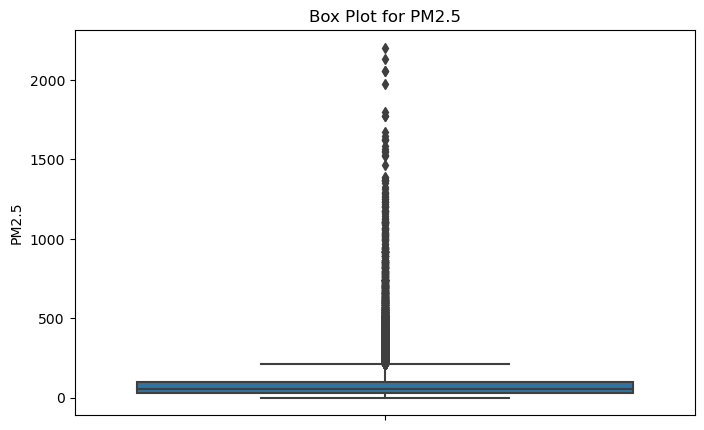

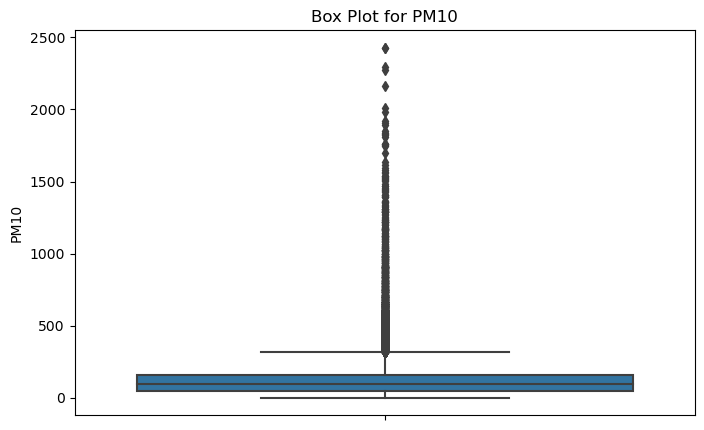

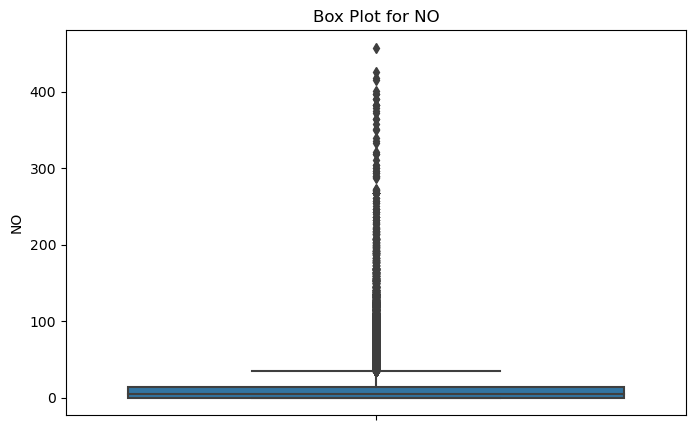

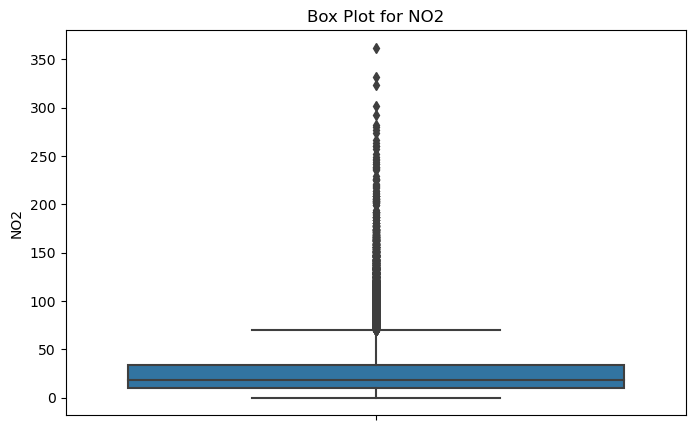

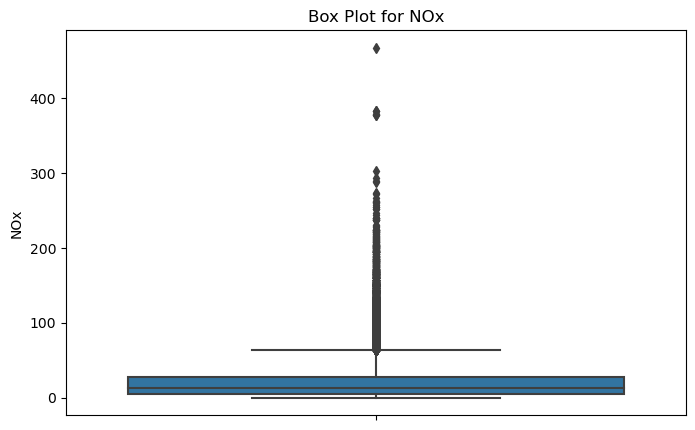

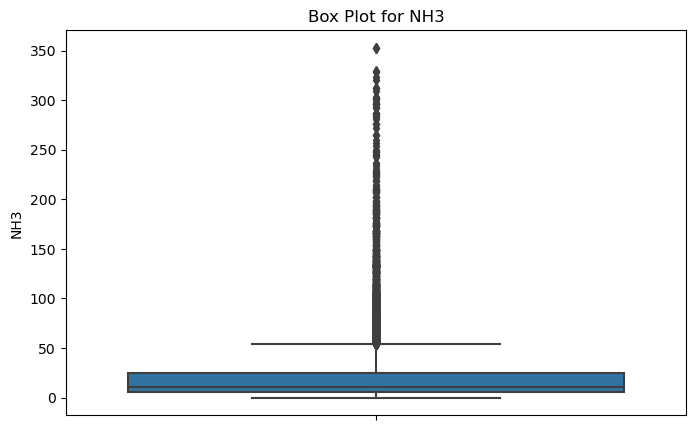

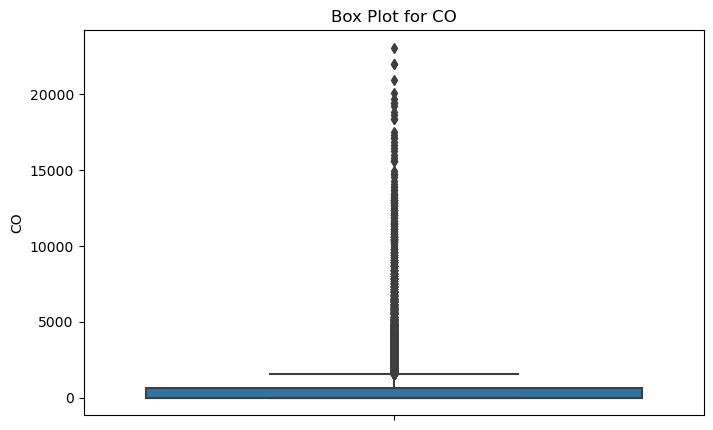

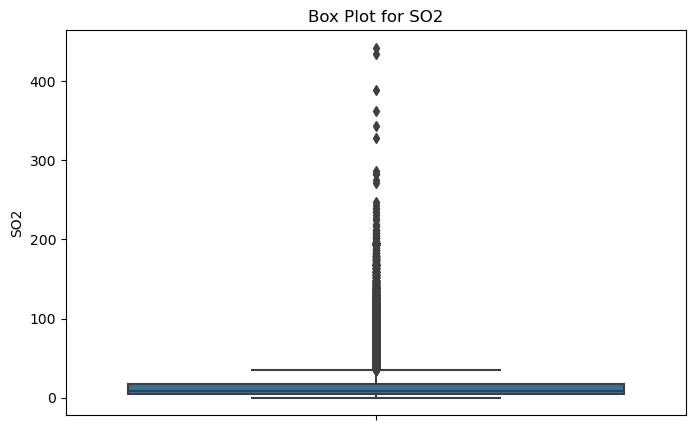

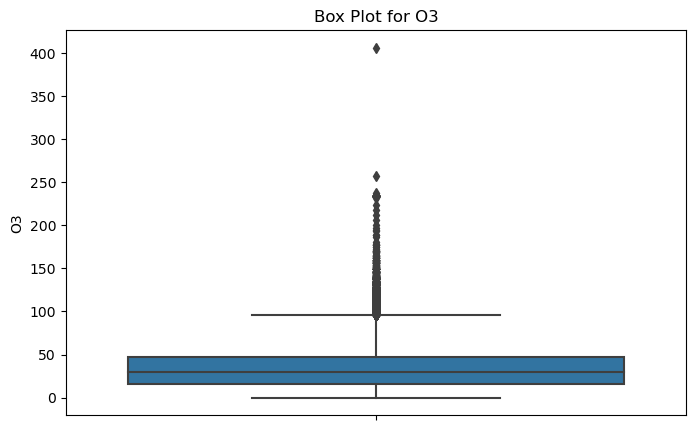

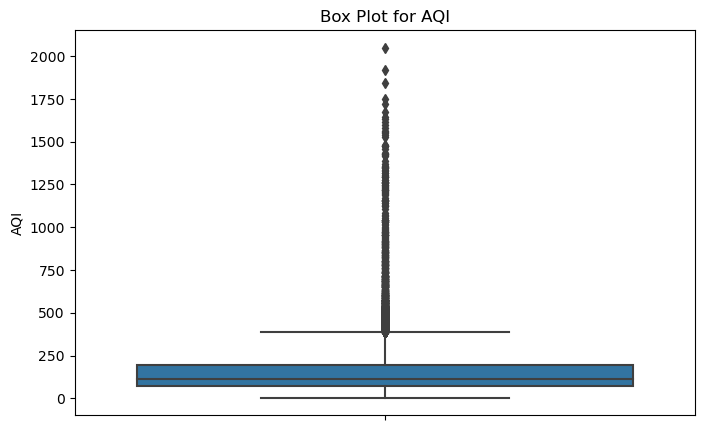

In [21]:
# Select columns for outlier detection
pollutant_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','AQI']

# Create a box plot for each pollutant column
for column in pollutant_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, y=column)
    plt.title(f'Box Plot for {column}')
    plt.show()

# Fill the AQI column null values with calculted AQI from polutants

In [22]:
import pandas as pd

# Read the CSV file into a DataFrame


# Define the list of pollutant columns
pollutant_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']

# Function to calculate Indian AQI for a single pollutant concentration
def calculate_indian_aqi(pollutant, concentration):
    # Define CPCB breakpoints and corresponding AQI values for the pollutant
    breakpoints = [0, 30, 60, 90, 120, 250, 350, 430, 500]
    aqi_values = [0, 50, 100, 200, 300, 400, 500, 600, 600]  # Add one more AQI value corresponding to the highest breakpoint

    if pd.notna(concentration):  # Check if concentration is not NaN and within the valid range
        if concentration < 0:  # Ensure concentration is not less than 0
            return 0
        if concentration >= breakpoints[-1]:  # Ensure concentration is not greater than or equal to the maximum breakpoint
            return aqi_values[-1]

        # Calculate the Indian AQI
        for i in range(1, len(breakpoints)):
            if concentration <= breakpoints[i]:
                aqi = ((aqi_values[i] - aqi_values[i-1]) / (breakpoints[i] - breakpoints[i-1])) * (concentration - breakpoints[i-1]) + aqi_values[i-1]
                break
        else:
            aqi = ((aqi_values[-1] - aqi_values[-2]) / (breakpoints[-1] - breakpoints[-2])) * (concentration - breakpoints[-2]) + aqi_values[-2]

        return round(aqi)
    else:
        return concentration  # Return NaN if the concentration is NaN

# Fill null values in the 'AQI' column with calculated values based on Indian AQI formula
data['AQI'] = data.apply(lambda row: calculate_indian_aqi('PM2.5', row['PM2.5']) if pd.isna(row['AQI']) else row['AQI'], axis=1)
for pollutant in pollutant_columns:
    data['AQI'] = data.apply(lambda row: max(row['AQI'], calculate_indian_aqi(pollutant, row[pollutant]) if pd.isna(row['AQI']) else row['AQI']), axis=1)

# Now, the 'AQI' column will have the calculated AQI values based on the Indian AQI formula for the pollutant concentrations, but only for the rows with null values in 'AQI'.


In [23]:
data.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
AQI              0
AQI_Bucket    4681
dtype: int64

# fill the AQI_Bucket value based on AQI

In [24]:
# import pandas as pd
# data set is copied to "data3"
data3=data
# Function to get the AQI_Bucket value based on AQI
def get_aqi_bucket(aqi):
    if aqi >= 0 and aqi <= 50:
        return "Good"
    elif aqi > 50 and aqi <= 100:
        return "Satisfactory"
    elif aqi > 100 and aqi <= 200:
        return "Moderate"
    elif aqi > 200 and aqi <= 300:
        return "Poor"
    elif aqi > 300 and aqi <= 400:
        return "Very Poor"
    elif aqi > 400:
        return "Severe"
    else:
        return None

# Assuming you have your DataFrame 'data' with the columns 'AQI' and 'AQI_Bucket'
# If you don't have the DataFrame 'data', you can create it by reading your CSV file

# Fill 'AQI_Bucket' column based on 'AQI' values only for null values
data3['AQI_Bucket'] = data.apply(lambda row: get_aqi_bucket(row['AQI']) if pd.isna(row['AQI_Bucket']) else row['AQI_Bucket'], axis=1)

# Display the DataFrame to verify the changes
print(data3)


                City       Date  PM2.5    PM10     NO    NO2        NOx   NH3  \
0          Ahmedabad 2015-01-01  73.24  141.54   0.92  18.22  17.150000  8.36   
1          Ahmedabad 2015-01-02  73.24  141.54   0.97  15.69  16.460000  8.36   
2          Ahmedabad 2015-01-03  73.24  141.54  17.40  19.30  29.700000  8.36   
3          Ahmedabad 2015-01-04  73.24  141.54   1.70  18.48  17.970000  8.36   
4          Ahmedabad 2015-01-05  73.24  141.54  22.10  21.42  37.760000  8.36   
...              ...        ...    ...     ...    ...    ...        ...   ...   
53030  Visakhapatnam 2023-05-21  37.53   47.09   0.00   2.08   0.669056  0.08   
53031  Visakhapatnam 2023-05-22  32.17   43.44   0.00   3.77   1.212664  1.74   
53032  Visakhapatnam 2023-05-23  36.01   48.06   0.00   4.28   1.376711  1.20   
53033  Visakhapatnam 2023-05-24  30.17   48.89   0.00   1.36   0.437460  0.00   
53034  Visakhapatnam 2023-05-25  52.36   61.41   0.00   6.00   1.929969  0.20   

           CO    SO2      O

In [25]:
data3.head(50)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,8.36,0.92,27.64,133.36,144.0,Moderate
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,8.36,0.97,24.55,34.06,144.0,Moderate
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,8.36,17.40,29.07,30.70,144.0,Moderate
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,8.36,1.70,18.59,36.08,144.0,Moderate
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,8.36,22.10,39.33,39.31,144.0,Moderate
5,Ahmedabad,2015-01-06,73.24,141.54,45.41,38.48,81.50,8.36,45.41,45.76,46.51,144.0,Moderate
6,Ahmedabad,2015-01-07,73.24,141.54,112.16,40.62,130.77,8.36,112.16,32.28,33.47,144.0,Moderate
7,Ahmedabad,2015-01-08,73.24,141.54,80.87,36.74,96.75,8.36,80.87,38.54,31.89,144.0,Moderate
8,Ahmedabad,2015-01-09,73.24,141.54,29.16,31.00,48.00,8.36,29.16,58.68,25.75,144.0,Moderate
9,Ahmedabad,2015-01-10,73.24,141.54,29.16,7.04,0.00,8.36,29.16,8.29,4.55,144.0,Moderate


In [26]:
data3.tail(50)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
52985,Visakhapatnam,2023-06-04,7.62,16.56,0.00,3.38,1.087216,0.86,323.77,2.80,34.69,34.690000,Good
52986,Visakhapatnam,2023-07-04,9.52,17.37,0.00,3.04,0.977851,1.66,330.45,2.35,29.68,29.680000,Good
52987,Visakhapatnam,2023-08-04,22.12,36.30,0.02,9.85,3.174798,8.23,534.06,7.15,16.27,36.866667,Good
52988,Visakhapatnam,2023-09-04,15.63,28.21,0.00,3.47,1.116165,2.12,360.49,2.24,24.32,28.210000,Good
52989,Visakhapatnam,2023-10-04,33.32,53.02,0.01,6.60,2.126182,4.18,460.62,3.93,19.67,55.533333,Satisfactory
52990,Visakhapatnam,2023-11-04,39.12,57.49,0.00,2.70,0.868486,1.25,333.79,2.00,45.42,65.200000,Satisfactory
52991,Visakhapatnam,2023-12-04,45.35,65.84,0.00,2.29,0.736605,1.98,317.10,2.24,65.09,75.583333,Satisfactory
52992,Visakhapatnam,2023-04-13,42.38,58.68,0.00,1.80,0.578991,1.28,290.39,1.74,53.64,70.633333,Satisfactory
52993,Visakhapatnam,2023-04-14,54.95,73.82,0.00,2.03,0.652973,0.97,307.08,1.76,61.51,91.583333,Satisfactory
52994,Visakhapatnam,2023-04-15,35.93,53.47,0.00,2.06,0.662623,1.50,310.42,1.64,36.48,59.883333,Satisfactory


In [27]:
data3

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.150000,8.36,0.92,27.64,133.36,144.000000,Moderate
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.460000,8.36,0.97,24.55,34.06,144.000000,Moderate
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.700000,8.36,17.40,29.07,30.70,144.000000,Moderate
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.970000,8.36,1.70,18.59,36.08,144.000000,Moderate
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.760000,8.36,22.10,39.33,39.31,144.000000,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53030,Visakhapatnam,2023-05-21,37.53,47.09,0.00,2.08,0.669056,0.08,353.81,4.11,100.14,100.102941,Moderate
53031,Visakhapatnam,2023-05-22,32.17,43.44,0.00,3.77,1.212664,1.74,380.52,5.07,82.97,82.970000,Satisfactory
53032,Visakhapatnam,2023-05-23,36.01,48.06,0.00,4.28,1.376711,1.20,390.53,5.19,80.11,80.110000,Satisfactory
53033,Visakhapatnam,2023-05-24,30.17,48.89,0.00,1.36,0.437460,0.00,300.41,2.21,95.84,95.840000,Satisfactory


<Axes: >

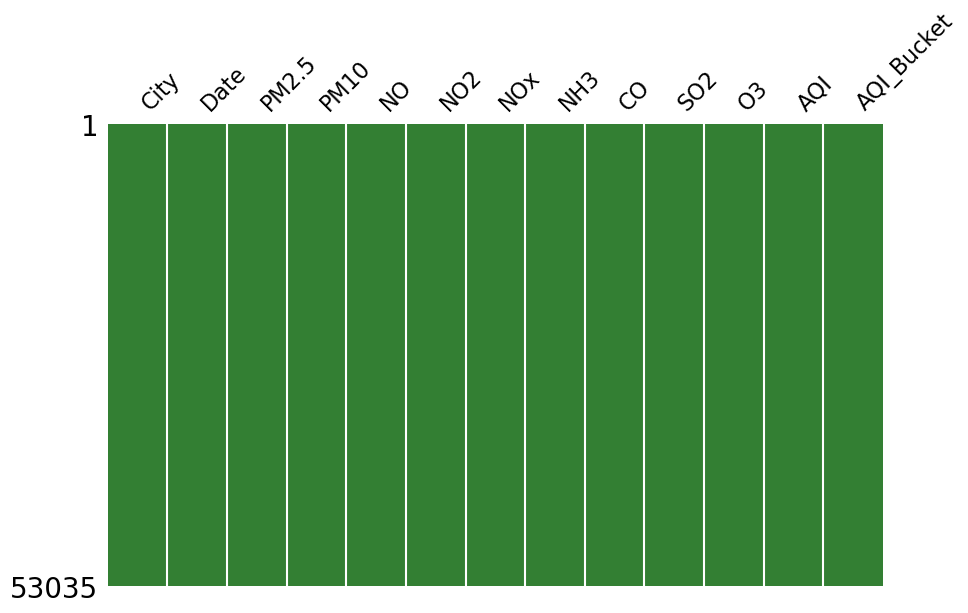

In [28]:
# Display null values filled in different colors
msno.matrix(data3, figsize=(10, 6), sparkline=False, color=(0.2, 0.5, 0.2))


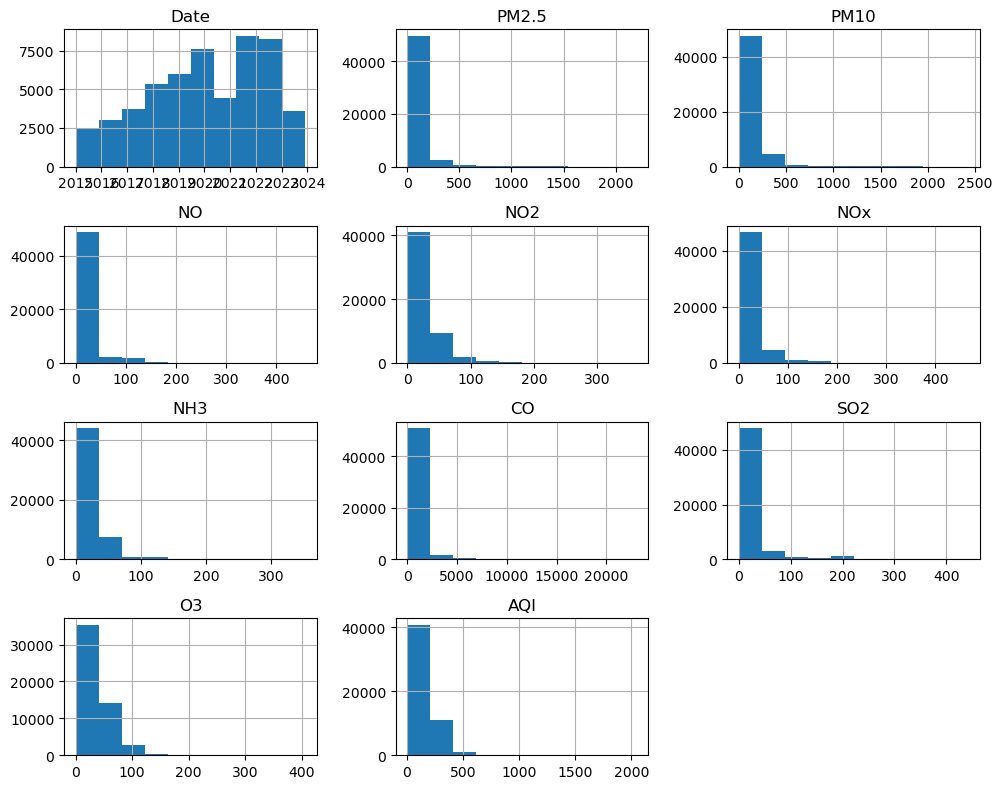

In [29]:
# Plot histograms for numerical variables
data3.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()#It allow us to identify the central tendency (mean, median) and the 
#presence of outliers,its a skewed histogram suggesting a non-normal distribution This information is valuable for understanding the data characteristics and potential insights it may provide.

# Handle outliers using Z-score method

In [30]:
# Define a function to handle outliers using Z-score
dataz=data3
def handle_outliers_zscore(dataz, columns, threshold=3):
    for column in columns:
        # Calculate the Z-score for the current column
        z_scores = np.abs((dataz[column] - dataz[column].mean()) / dataz[column].std())
        # Identify and filter out rows with Z-scores beyond the threshold
        dataz= dataz[z_scores <= threshold]
    return dataz

# Columns on which you want to apply the Z-score method (numeric columns)
numeric_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']

# Handle outliers using Z-score
data_cleaned = handle_outliers_zscore(dataz, numeric_columns)

# Display the cleaned DataFrame
print(data_cleaned)

                City       Date  PM2.5    PM10     NO    NO2        NOx   NH3  \
1          Ahmedabad 2015-01-02  73.24  141.54   0.97  15.69  16.460000  8.36   
2          Ahmedabad 2015-01-03  73.24  141.54  17.40  19.30  29.700000  8.36   
3          Ahmedabad 2015-01-04  73.24  141.54   1.70  18.48  17.970000  8.36   
4          Ahmedabad 2015-01-05  73.24  141.54  22.10  21.42  37.760000  8.36   
8          Ahmedabad 2015-01-09  73.24  141.54  29.16  31.00  48.000000  8.36   
...              ...        ...    ...     ...    ...    ...        ...   ...   
53030  Visakhapatnam 2023-05-21  37.53   47.09   0.00   2.08   0.669056  0.08   
53031  Visakhapatnam 2023-05-22  32.17   43.44   0.00   3.77   1.212664  1.74   
53032  Visakhapatnam 2023-05-23  36.01   48.06   0.00   4.28   1.376711  1.20   
53033  Visakhapatnam 2023-05-24  30.17   48.89   0.00   1.36   0.437460  0.00   
53034  Visakhapatnam 2023-05-25  52.36   61.41   0.00   6.00   1.929969  0.20   

           CO    SO2      O

In [31]:
data_cleaned.shape

(43389, 13)

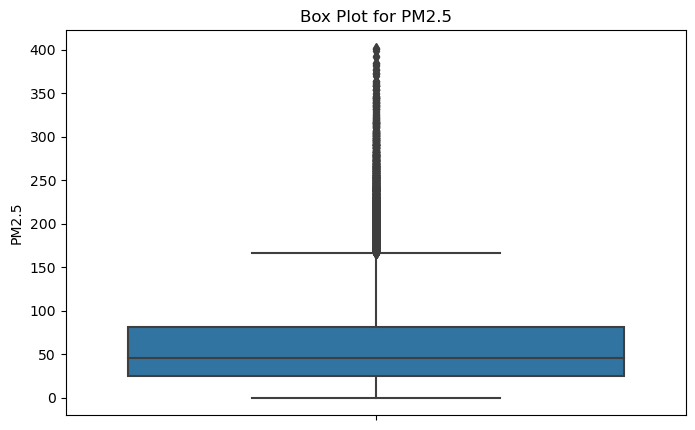

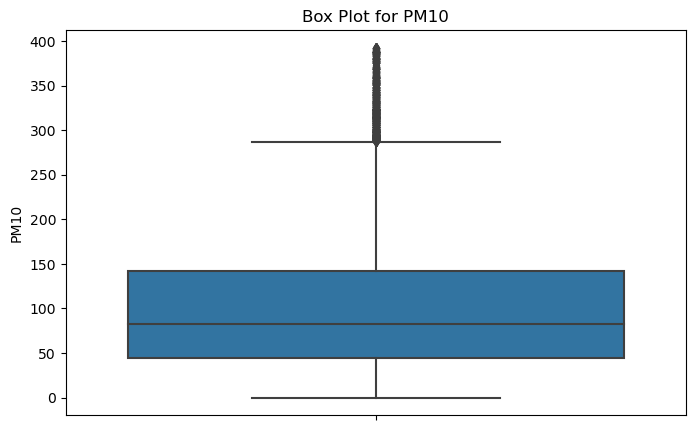

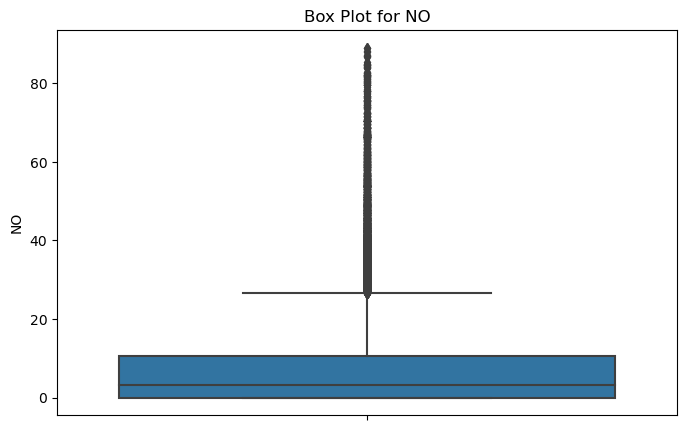

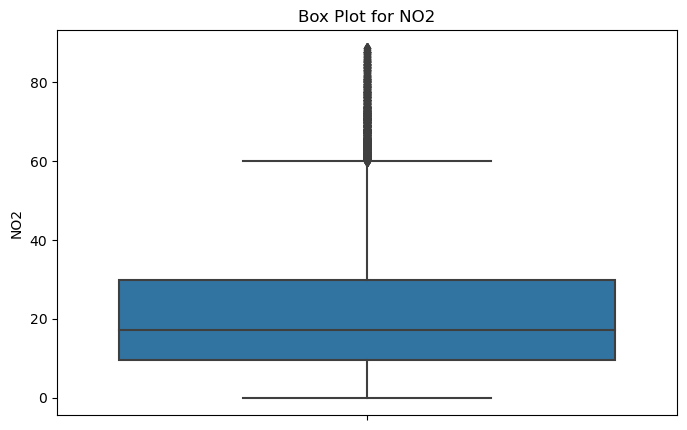

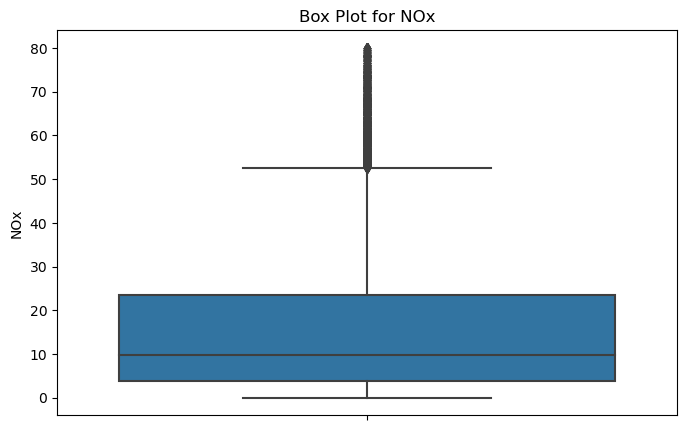

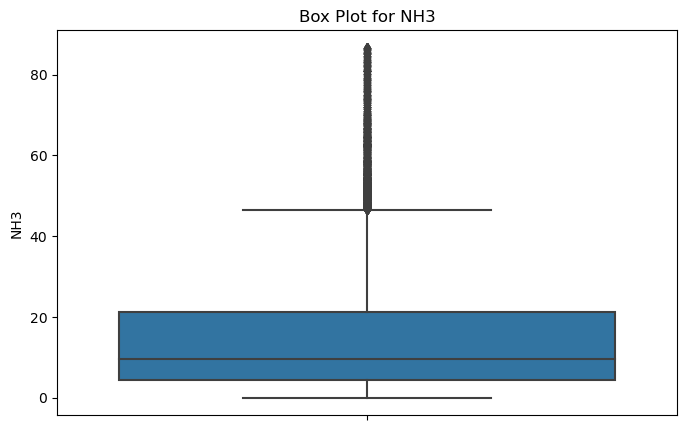

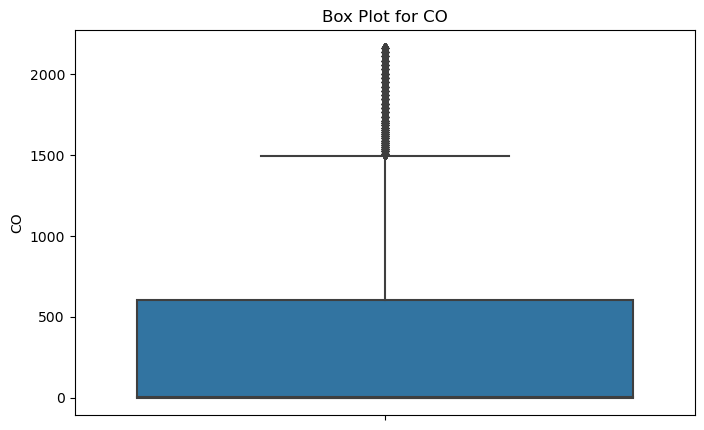

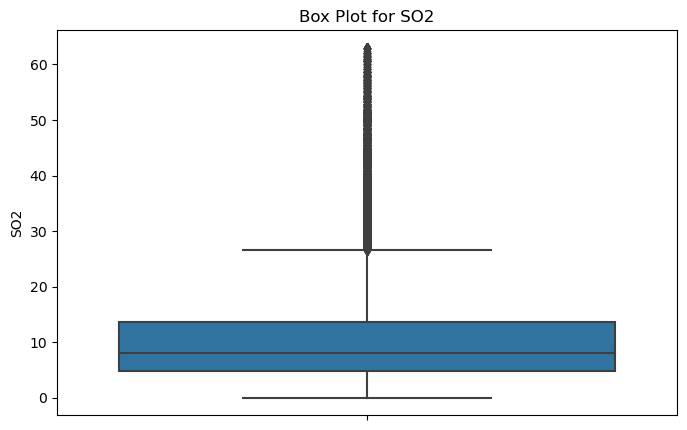

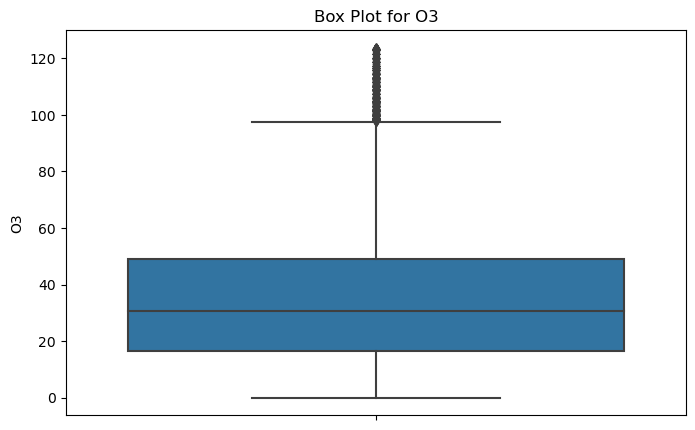

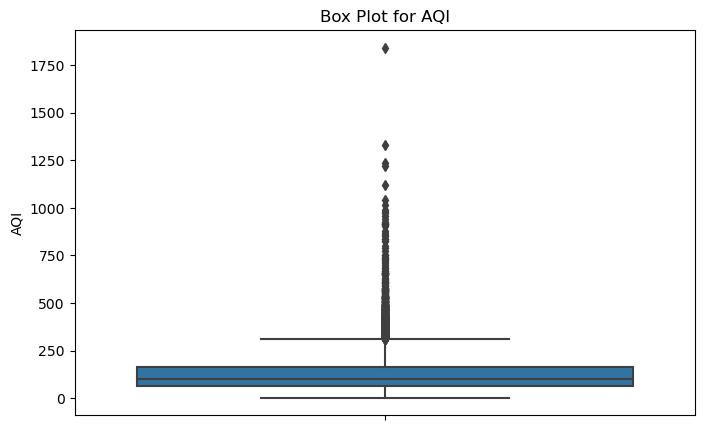

In [32]:
# Select columns for outlier detection
pollutant_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','AQI']

# Create a box plot for each pollutant column
for column in pollutant_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data_cleaned, y=column)
    plt.title(f'Box Plot for {column}')
    plt.show()

# after  handling outliers using  z-score methods

In [33]:
data_cleaned.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000
mean,62.038449,95.882385,7.595966,21.455540,15.917597,15.244768,350.710115,11.368961,35.275100,123.356323
std,54.233156,67.890001,11.249624,15.817159,16.240551,15.163435,477.316418,10.568063,25.344371,89.711564
min,0.040000,0.010000,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,3.000000
25%,24.390000,44.220000,0.000000,9.640000,3.914620,4.370000,0.840000,4.890000,16.510000,62.000000
50%,46.080000,82.080000,3.170000,17.270000,9.830000,9.600000,4.100000,7.990000,30.570000,100.066667
75%,81.230000,141.540000,10.650000,29.740000,23.400000,21.260000,600.810000,13.570000,49.040000,162.000000
max,402.470000,392.610000,89.050000,88.720000,80.080000,86.670000,2162.930000,63.030000,123.800000,1842.000000


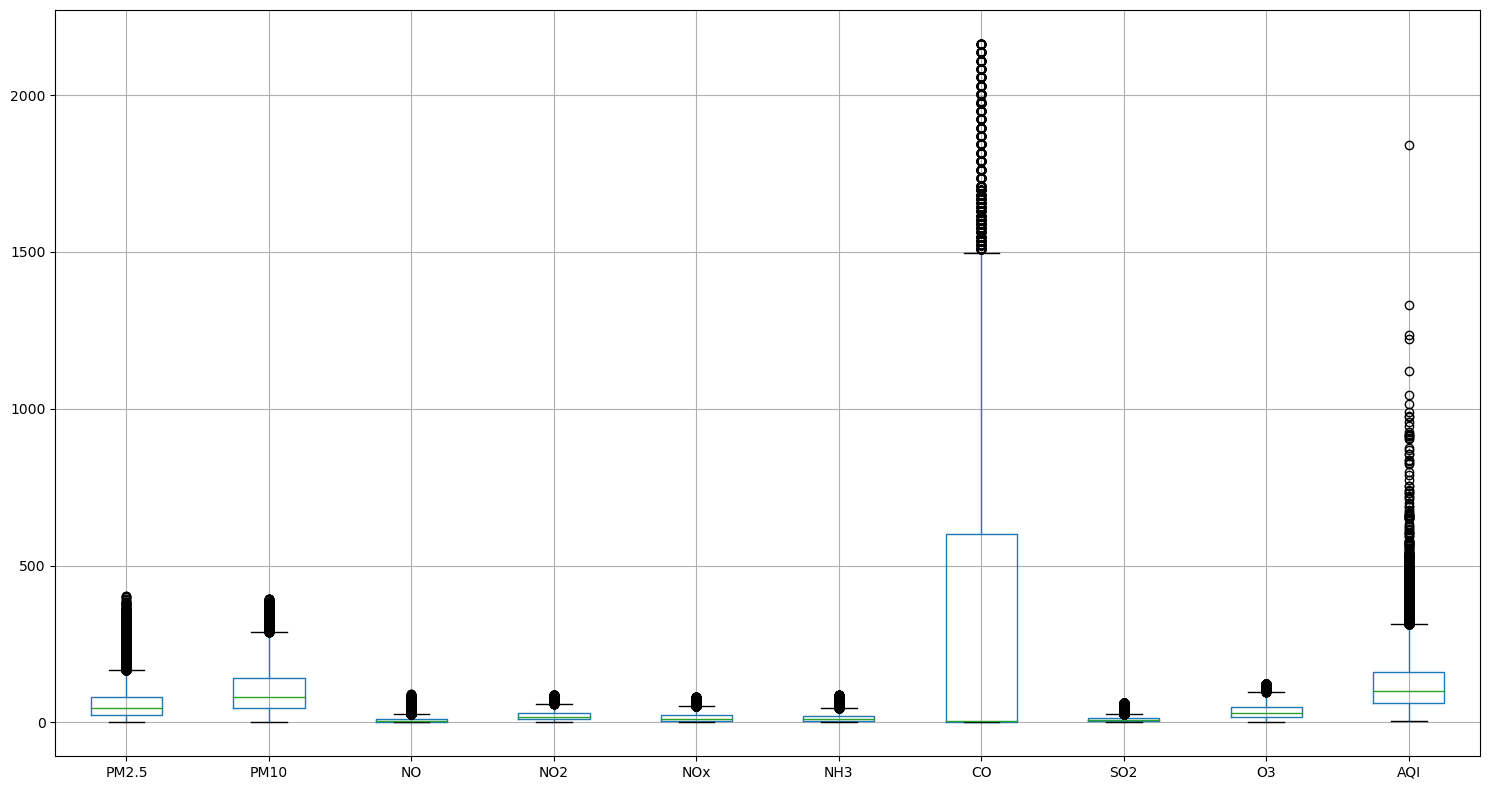

In [34]:
#Create box plots to identify outliers
data_cleaned.boxplot(figsize=(15, 8))
plt.tight_layout()
plt.show()
#it provide knowledge and understanding of the data also understanding the error in data as outlier

# outlier handling using roburst method

In [35]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Read the CSV file into a pandas DataFrame
dataR=data3

# Extract the columns that need to be robustly scaled
# Assuming 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3' are the features
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']

# Create the RobustScaler object
scaler = RobustScaler()

# Fit the scaler to the data and transform the specified columns
dataR[columns_to_scale] = scaler.fit_transform(dataR[columns_to_scale])

# Now the specified columns are robustly scaled using the median and interquartile range
# The scaled data is stored in the 'data3' DataFrame

# Display the scaled data3
print(dataR)


                City       Date     PM2.5      PM10        NO       NO2  \
0          Ahmedabad 2015-01-01  0.286174  0.456878 -0.313796  0.004141   
1          Ahmedabad 2015-01-02  0.286174  0.456878 -0.310222 -0.100621   
2          Ahmedabad 2015-01-03  0.286174  0.456878  0.864189  0.048861   
3          Ahmedabad 2015-01-04  0.286174  0.456878 -0.258041  0.014907   
4          Ahmedabad 2015-01-05  0.286174  0.456878  1.200143  0.136646   
...              ...        ...       ...       ...       ...       ...   
53030  Visakhapatnam 2023-05-21 -0.192929 -0.427568 -0.379557 -0.664182   
53031  Visakhapatnam 2023-05-22 -0.264842 -0.461747 -0.379557 -0.594203   
53032  Visakhapatnam 2023-05-23 -0.213323 -0.418485 -0.379557 -0.573085   
53033  Visakhapatnam 2023-05-24 -0.291675 -0.410713 -0.379557 -0.693996   
53034  Visakhapatnam 2023-05-25  0.006037 -0.293473 -0.379557 -0.501863   

            NOx       NH3        CO       SO2        O3         AQI  \
0      0.180996 -0.107582 -0

# after robust methods

In [36]:
dataR.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,53035.000000,53035.000000,53035.000000,53035.000000,53035.000000,53035.000000,53035.000000,53035.000000,53035.000000,53035.000000
mean,0.429128,0.286072,0.668191,0.324663,0.408389,0.440670,0.784542,0.881543,0.173275,144.221588
std,1.441875,1.186833,2.083799,1.024596,1.251289,1.227269,1.729974,2.754706,0.904872,119.602762
min,-0.695915,-0.868433,-0.379557,-0.749896,-0.550799,-0.535861,-0.004739,-0.736799,-0.912582,3.000000
25%,-0.345542,-0.413896,-0.378842,-0.348240,-0.361579,-0.258197,-0.003415,-0.311056,-0.428036,65.800000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109.583333
75%,0.654458,0.586104,0.621158,0.651760,0.638421,0.741803,0.996585,0.688944,0.571964,201.438462
max,28.867512,21.878266,32.340958,14.248033,19.403086,17.542520,36.809778,35.773102,11.771464,2049.000000


# ploting outlier after Roburst Methods

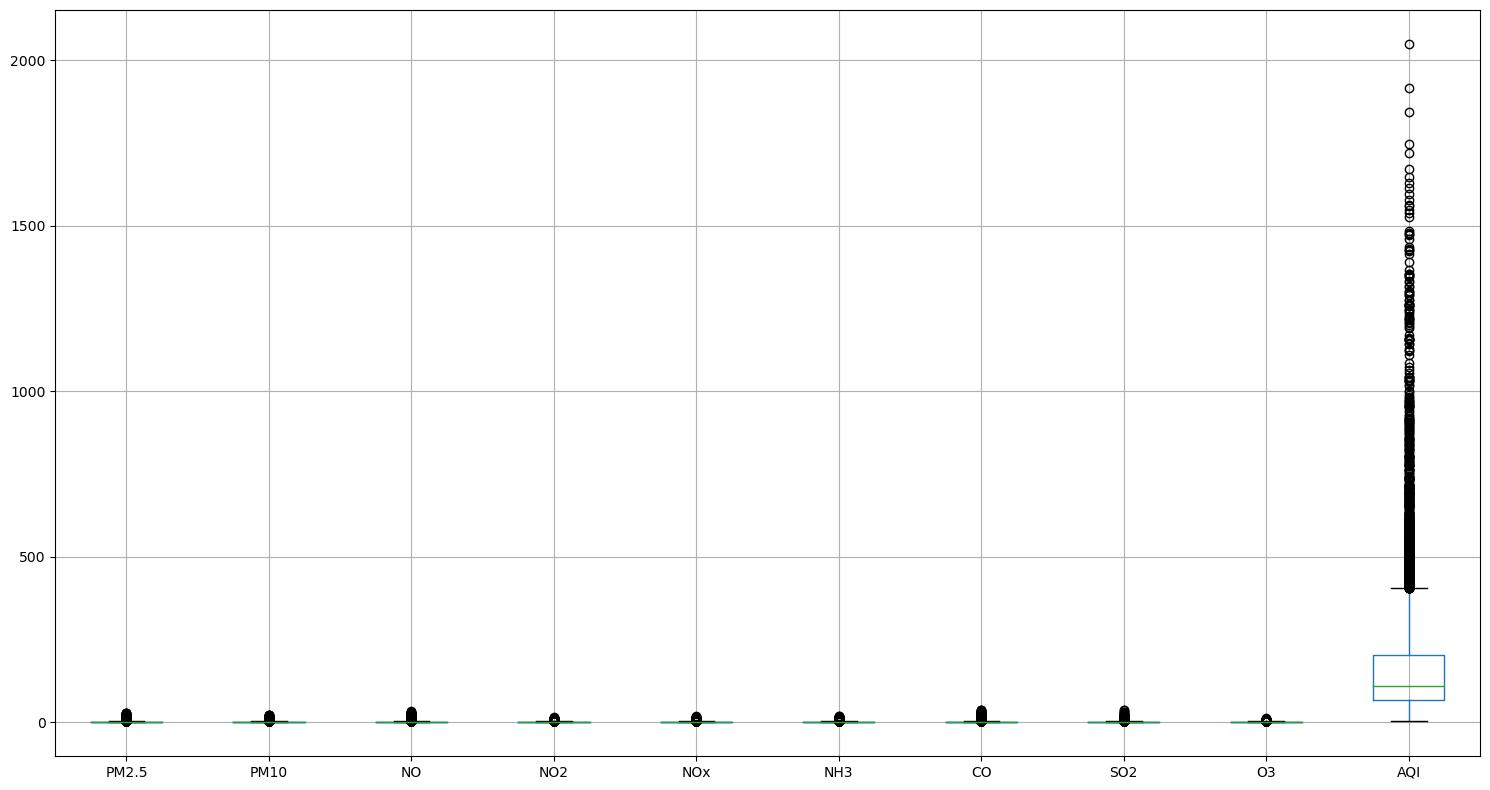

In [37]:
# Create box plots to identify outliers
dataR.boxplot(figsize=(15, 8))
plt.tight_layout()
plt.show()
#it provide knowledge and understanding of the data also understanding the error in data as outliers

# standard scaler method for outlier handling

In [38]:
# standard scaler method for outlier handling
from sklearn.preprocessing import StandardScaler
dataS=data

# Extract the columns that need to be standardized
# Assuming 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3'are the features
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']

# Create the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the specified columns
dataS[columns_to_scale] = scaler.fit_transform(data2[columns_to_scale])

# Now the specified columns are standardized with zero mean and unit variance
# The standardized data is stored in the 'data' DataFrame

# Display the standardized data
print(dataS)

                City       Date     PM2.5      PM10        NO       NO2  \
0          Ahmedabad 2015-01-01 -0.099145  0.143919 -0.471253 -0.312831   
1          Ahmedabad 2015-01-02 -0.099145  0.143919 -0.469538 -0.415079   
2          Ahmedabad 2015-01-03 -0.099145  0.143919  0.094059 -0.269184   
3          Ahmedabad 2015-01-04 -0.099145  0.143919 -0.444497 -0.302323   
4          Ahmedabad 2015-01-05 -0.099145  0.143919  0.255282 -0.183506   
...              ...        ...       ...       ...       ...       ...   
53030  Visakhapatnam 2023-05-21 -0.431426 -0.601304 -0.502811 -0.965116   
53031  Visakhapatnam 2023-05-22 -0.481301 -0.630102 -0.502811 -0.896816   
53032  Visakhapatnam 2023-05-23 -0.445570 -0.593650 -0.502811 -0.876205   
53033  Visakhapatnam 2023-05-24 -0.499911 -0.587101 -0.502811 -0.994215   
53034  Visakhapatnam 2023-05-25 -0.293433 -0.488317 -0.502811 -0.806693   

            NOx       NH3        CO       SO2        O3         AQI  \
0     -0.181729 -0.446730 -0

# after standard scaler method

In [39]:
dataS.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,5.303500e+04,5.303500e+04,5.303500e+04,5.303500e+04,5.303500e+04,5.303500e+04,5.303500e+04,5.303500e+04,5.303500e+04,53035.000000
mean,3.536971e-17,-8.574476e-18,3.429791e-17,-2.143619e-17,-1.714895e-17,-1.714895e-17,-2.143619e-18,3.429791e-17,-2.679524e-18,144.221588
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,119.602762
min,-7.802706e-01,-9.727705e-01,-5.028115e-01,-1.048774e+00,-7.665669e-01,-7.957020e-01,-4.562428e-01,-5.874879e-01,-1.200023e+00,3.000000
25%,-5.372707e-01,-5.897839e-01,-5.024685e-01,-6.567560e-01,-6.153457e-01,-5.694545e-01,-4.554772e-01,-4.329355e-01,-6.645322e-01,65.800000
50%,-2.976206e-01,-2.410405e-01,-3.206632e-01,-3.168725e-01,-3.263775e-01,-3.590693e-01,-4.535033e-01,-3.200164e-01,-1.914926e-01,109.583333
75%,1.562770e-01,2.528023e-01,-2.257124e-02,3.192473e-01,1.838375e-01,2.453707e-01,1.225715e-01,-6.991698e-02,4.406071e-01,201.438462
max,1.972338e+01,1.819329e+01,1.519967e+01,1.358926e+01,1.518024e+01,1.393502e+01,2.082434e+01,1.266628e+01,1.281762e+01,2049.000000


# Plot after standard scaler method

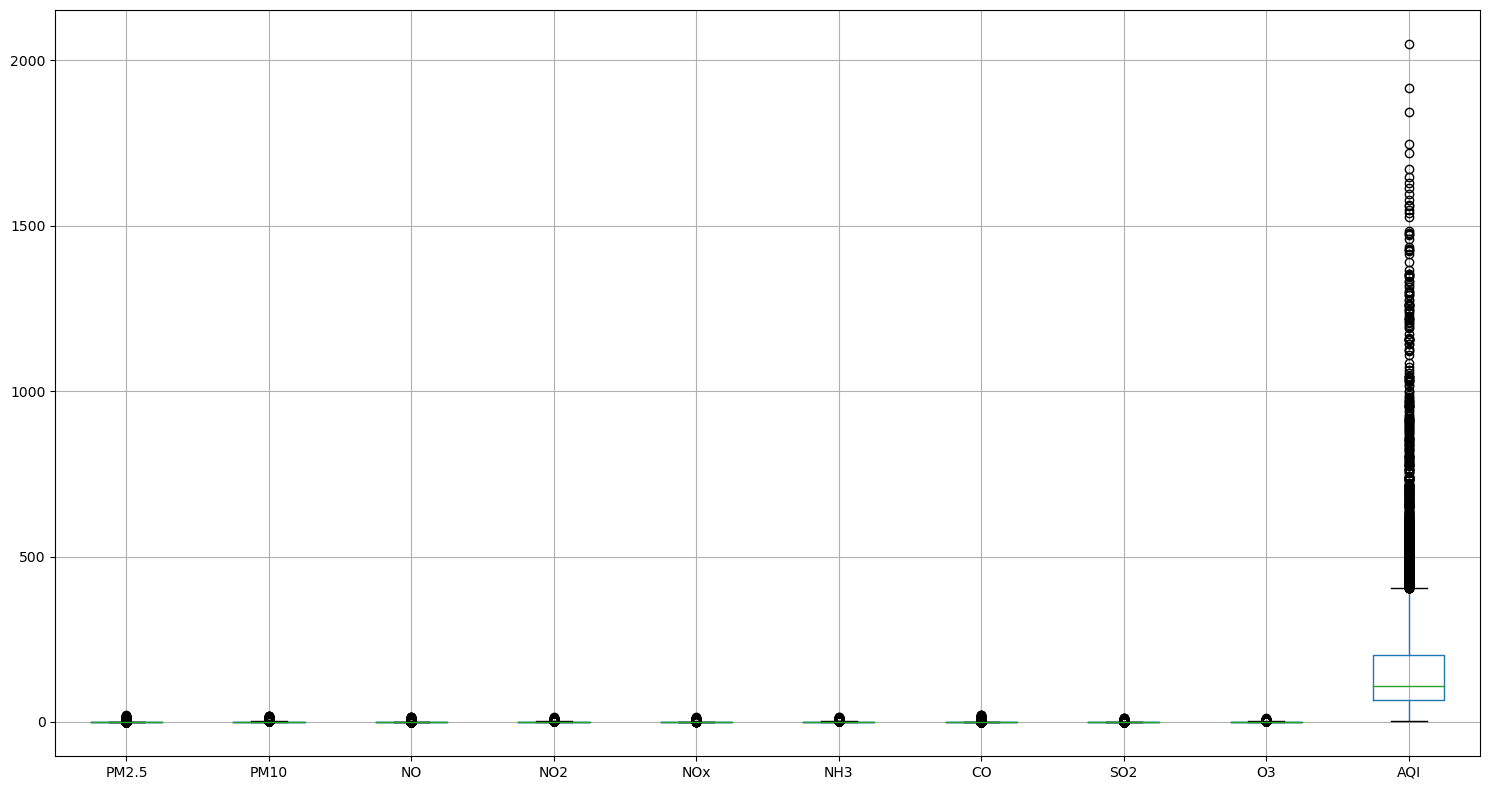

In [40]:
# Create box plots to identify outliers
dataS.boxplot(figsize=(15, 8))
plt.tight_layout()
plt.show()
#it provide knowledge and understanding of the data also understanding the error in data as outliers

In [41]:
data_cleaned.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'AQI', 'AQI_Bucket'],
      dtype='object')